<a href="https://colab.research.google.com/github/shipra-saxena/miniature-potato/blob/master/Cifar-10using_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from IPython.display import Image, SVG
import matplotlib.pyplot as plt

%matplotlib inline
import time
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
% matplotlib inline
np.random.seed(2019) 
import numpy as np
import keras
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense

from keras.utils.vis_utils import model_to_dot

In [0]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()


In [0]:
from tensorflow.image import rgb_to_grayscale
X_train=rgb_to_grayscale(X_train)
X_test=rgb_to_grayscale(X_test)

In [0]:
X_train = X_train.eval()
X_test = X_test.eval()


In [0]:
img_rows, img_cols=  X_train.shape[1],X_train.shape[2]

In [0]:
X_train = X_train.reshape(X_train.shape[0],img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0],img_rows*img_cols)


#hotone encoding
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#normalization of data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [0]:
X_train.shape

(50000, 1024)

In [0]:
def simple_nn():
    # initialize model
    model = Sequential()
    # add an input layer and a hidden layer
    model.add(Dense(100, input_dim =img_rows*img_cols))
    # add activation layer to add non-linearity
    model.add(Activation('relu'))
    model.add(Dense(100, input_dim =img_rows*img_cols))
    # add activation layer to add non-linearity
    model.add(Activation('relu'))
    model.add(Dense(100, input_dim =img_rows*img_cols))
    # add activation layer to add non-linearity
    model.add(Activation('relu'))
    model.add(Dense(100, input_dim =img_rows*img_cols))
    # add activation layer to add non-linearity
    model.add(Activation('relu'))
    # to add ReLu instead of sigmoid: model.add(Activation('relu'))
    # combine above 2 layers: model.add(Dense(100, input_dim=784),Activation('sigmoid'))
    # add output layer
    model.add(Dense(10))
    # add softmax layer 
    model.add(Activation('softmax'))
    return model


In [0]:
model = simple_nn()
# define optimizer
sgd = SGD(lr=0.01)
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
# print model information
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 100)               102500    
_________________________________________________________________
activation_11 (Activation)   (None, 100)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               10100     
_________________________________________________________________
activation_12 (Activation)   (None, 100)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 100)               10100     
_________________________________________________________________
activation_13 (Activation)   (None, 100)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 100)               10100     
__________

In [0]:
start = time.time()
model_info = model.fit(X_train,Y_train, batch_size=32, \
                       epochs=50, verbose=2, validation_split=0.2)
end = time.time()
print("Model took %0.2f seconds to train"%(end - start))

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
 - 3s - loss: 0.0846 - acc: 0.2419 - val_loss: 0.0813 - val_acc: 0.3002
Epoch 2/50
 - 3s - loss: 0.0810 - acc: 0.3056 - val_loss: 0.0800 - val_acc: 0.3198
Epoch 3/50
 - 3s - loss: 0.0795 - acc: 0.3234 - val_loss: 0.0798 - val_acc: 0.3161
Epoch 4/50
 - 3s - loss: 0.0785 - acc: 0.3369 - val_loss: 0.0783 - val_acc: 0.3361
Epoch 5/50
 - 3s - loss: 0.0776 - acc: 0.3510 - val_loss: 0.0782 - val_acc: 0.3371
Epoch 6/50
 - 3s - loss: 0.0768 - acc: 0.3600 - val_loss: 0.0784 - val_acc: 0.3367
Epoch 7/50
 - 3s - loss: 0.0762 - acc: 0.3684 - val_loss: 0.0768 - val_acc: 0.3574
Epoch 8/50
 - 3s - loss: 0.0757 - acc: 0.3740 - val_loss: 0.0772 - val_acc: 0.3547
Epoch 9/50
 - 3s - loss: 0.0752 - acc: 0.3798 - val_loss: 0.0766 - val_acc: 0.3642
Epoch 10/50
 - 3s - loss: 0.0747 - acc: 0.3839 - val_loss: 0.0754 - val_acc: 0.3734
Epoch 11/50
 - 3s - loss: 0.0742 - acc: 0.3908 - val_loss: 0.0759 - val_acc: 0.3706
Epoch 12/50
 - 3s - loss: 0.0737 - 

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

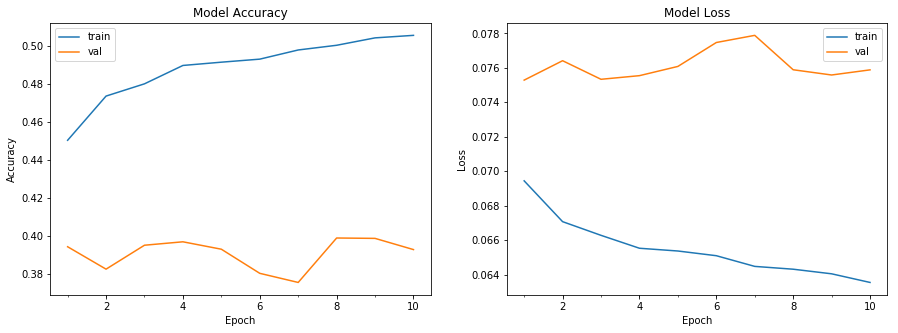

In [0]:
plot_model_history(model_info)

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
print("Accuracy on test data is: %0.2f"%accuracy(X_train, Y_train, model)
     )

Accuracy on test data is: 49.45
